In [1]:
import sys
sys.path.append('..')

In [2]:
from agents.ddqn import *
from utils.replay import *
from environments.wrappers import *
from networks.flexnet import *
from utils.train import *
from utils.logger import *
from utils.render import *

In [3]:
import gym
import torch

### Network, Environment, Agent

In [4]:
# parameters
img_size = (84, 84)
num_stacked_frames = 4

raw_env = gym.make('BreakoutNoFrameskip-v4')
env = AtariWrapper(raw_env, k=num_stacked_frames, img_size=img_size)

In [5]:
observation_space = raw_env.observation_space
action_space = raw_env.action_space

params = {'epsilon':1.0, 'epsilon_min':0.1, 'epsilon_decay': None, 'eps_ff': 1000000, 'eps_interval':0.9, 'eps_start':1.0, 'gamma':0.99, 'alpha':2.5e-5, 
          'network_params': None, 'memory_size':150000, 'device':'cuda:0', 'batch_size':32, 'target_net_updates':10000}

agent = DQNAgent(observation_space, action_space, **params)

In [6]:
agent.network

DeepmindCNN(
  (network): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=512, bias=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=4, bias=True)
  )
)

### Standard Train

In [7]:
logger = Logger('training_info')

In [8]:
save_dir = '../models/breakout/'
training_params = {'total_steps':20000000, 'logger':logger, 'save_freq':500000, 'e_verbose':50000, 'file_name': 'breakout ddqn', 'save_dir':save_dir}

In [9]:
standard_train(agent, env, **training_params)

Steps : 50000, Average Reward: 1.0210526315789474, Memory Length: 50000, Optimizer Steps: 50000, Time Elapsed: 285.00275683403015, Target Q Updates: 5
Steps : 100000, Average Reward: 1.3037037037037038, Memory Length: 100000, Optimizer Steps: 100000, Time Elapsed: 357.76484966278076, Target Q Updates: 10
Steps : 150000, Average Reward: 1.224264705882353, Memory Length: 150000, Optimizer Steps: 150000, Time Elapsed: 440.11166548728943, Target Q Updates: 15
Steps : 200000, Average Reward: 1.6007905138339922, Memory Length: 150000, Optimizer Steps: 200000, Time Elapsed: 508.79707169532776, Target Q Updates: 20
Steps : 250000, Average Reward: 2.2813852813852815, Memory Length: 150000, Optimizer Steps: 250000, Time Elapsed: 504.8848078250885, Target Q Updates: 25
Steps : 300000, Average Reward: 2.5622119815668203, Memory Length: 150000, Optimizer Steps: 300000, Time Elapsed: 501.18783617019653, Target Q Updates: 30
Steps : 350000, Average Reward: 2.517857142857143, Memory Length: 150000, Op

In [11]:
path = '../models/breakout/breakout ddqn final.pth'

In [12]:
agent.save(path)

## Watch

Reward: 165.0


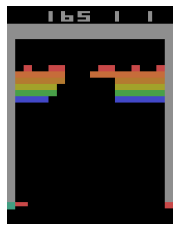

In [13]:
render_agent(agent, env, path, 2)

## Plot

In [14]:
import matplotlib.pyplot as plt

In [23]:
training_info = pd.read_csv('../atari/csvs/breakout_ddqn_training_info.csv')

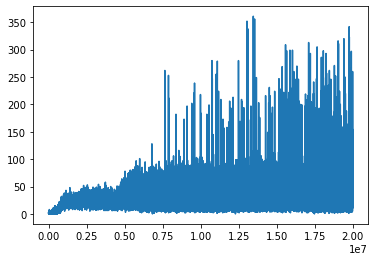

In [36]:
plt.plot(training_info['training_step'], training_info[' return'])